# Perceptron
Google : sklearn perceptron

And you should find the following documentation page : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

## Template example on the sklearn website
```
from sklearn.datasets import load_digits
>>> from sklearn.linear_model import Perceptron
>>> X, y = load_digits(return_X_y=True)
>>> clf = Perceptron(tol=1e-3, random_state=0)
>>> clf.fit(X, y)  
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
      penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)
>>> clf.score(X, y) 
0.939...
```

Let's adapt it in order to use our own dataset, first we will create our own dataset

### Creation of our own dataset
Remember this is the one we used in the first class


In [81]:
#training_points = [[1,2], [2,1], [2,2], [2,3], [3,2], [6,5], [6,7], [7,6], [8,5], [8,7]]
training_points = [[20,8], [15,20], [16,10], [5,15], [16,6], [2,20]]
print("Le training set contient {} points".format(len(training_points)));
labels = [1,1,0,0,0,0];
for index_point in range(0,len(training_points)):
    print("The point {} has label {}".format(training_points[index_point], labels[index_point]));

Le training set contient 6 points
The point [20, 8] has label 1
The point [15, 20] has label 1
The point [16, 10] has label 0
The point [5, 15] has label 0
The point [16, 6] has label 0
The point [2, 20] has label 0


### Let's plot it
Please remember our template to load and display a dataset with matplotlib. Open your knn or kmeans notebook to find it.
```
'''
In pandas library, there is an attribute that allows us to convert our pandas object into a numpy object
This attribute is values
'''
# We want feature columns so we put 0:2 in order to select column 0 and column 1 (column 2 is target column)
X=data.iloc[:,0:2].values #converts our pandas dataframe into a numpy object

# Let's store the column target into y variable (remember that "last" in python means -1 in term of index)
y=data.iloc[:,-1].values #again we convert it into numpy object

# Now focus on target, how are the target values
'''
Let's check what are the differents values in target variable with unique(...) function from numpy library 
'''
print(numpy.unique(y)) # prints [-1  1] so no need conversion

# visualizing data
colors = numpy.array([x for x in "bgrcmyk"]) 
print(X.shape) #prints (5300, 2) that means X contains 5300 rows and 2 feature columns
# 2 features means that available indexes are 0,1 for scatter function
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=10) 
plt.show(); #https://github.com/jupyter/notebook/issues/3523
```

You have to adapt it. Here we created our own dataset so no need to load some dataset with pandas library.
Here our dataset is a list and not a pandas object, so we can't use the function *iloc[...]* and *.values(...)* which are inside the pandas package. Remember that the purpose of this function is to convert pandas to numpy array object. So here we need to convert a list into a numpy array object. We do it with the *array(...)* function from numpy library. Use it like this : 
```
import numpy as np
X = np.array(training_points)
y = np.array(labels)
```
Now plot your data

(6, 2)
(6,)


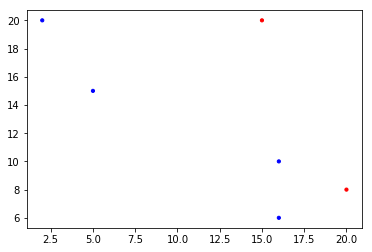

In [82]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array(training_points)
y = np.array(labels)
print(X.shape)
print(y.shape)
# visualizing data
colors = np.array([x for x in "brgckym"]) 
# 2 features means that available indexes are 0,1 for scatter function
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=10) 
plt.show(); #https://github.com/jupyter/notebook/issues/3523

We have a labeled dataset, so we can use perceptron because it is a supervised machine learning algorithm

## Online template example execution without modifications

In [14]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
print(X)
print(y)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)  
clf.score(X, y)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]


0.9510294936004452

Line 1 : **useless**, it is a library to load a dataset we already have one

Line 2 : **useful**, so we can import the perceptron method

Line 3 : **useless**, it imports data, we already have a X and a y

Line 4 and 5 : **useless**, just a print

Line 6 : **useful**, it is perceptron initialization

Line 7 : **useful**, it is the training process

Line 8 : **useful**, just to check if training data has been correctly learned

## Online template example execution with modifications
Be careful, don't forget to execute again the cell where we convert training_points and labels into numpy object stored in X and y variables so that X and y in memory are the good data

In [105]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter = 500, tol=None)
clf

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=500, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [106]:
clf.fit(X, y)  
clf.score(X, y)

1.0

In [107]:
y_pred = clf.predict(X)
y_pred

array([1, 1, 0, 0, 0, 0])

In [108]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y, y_pred))

Accuracy: 1.00


With maximum 50 iterations, perceptron model could learn correctly on training data (accuracy of 1)

## Let's predict some new points with our trained perceptron
First, create the test points

In [101]:
test_points = [[3,1], [20,20], [1,1]]
print("We have {} test points, but we don't know their label".format(len(test_points)))

We have 3 test points, but we don't know their label


Let's plot those points over the training set. 

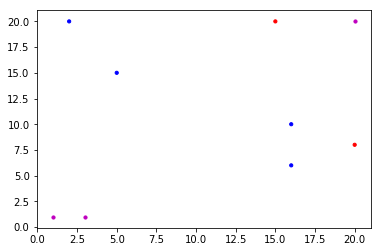

In [102]:
import numpy as np
import matplotlib.pyplot as plt
X_test = np.array(test_points)
# 2 features means that available indexes are 0,1 for scatter function
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=10) 
plt.scatter(X_test[:, 0], X_test[:, 1], color="m", s=10) #here we plot test points in magenta color
plt.show(); #https://github.com/jupyter/notebook/issues/3523

Red points have label 1, blue points have label 0, magenta points are test points.
Intuitively, we should guess that magenta points [1,1] and [3,1] seem to be blue points (label 0). Magenta point [20,20] seem to be a red point (label 1).

Let's check if perceptron learned well, i.e. that it has the expected behaviour.


In [103]:
print('Remind that X_test points are : \n{}'.format(X_test))
print('Each row is a point.')

Remind that X_test points are : 
[[ 3  1]
 [20 20]
 [ 1  1]]
Each row is a point.


In [104]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0])

Those are the expected labels, so our perceptron model learned correctly.


In [95]:
clf.coef_

array([[ 10.,   3.]])

In [96]:
clf.intercept_

array([-193.])

In [97]:
import matplotlib.lines as mlines

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

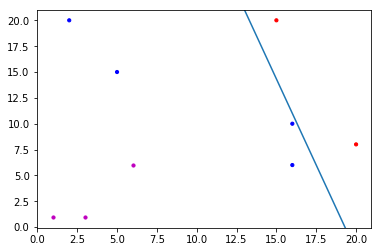

In [98]:
import numpy as np
X_test = np.array(test_points)
# 2 features means that available indexes are 0,1 for scatter function
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=10) 
plt.scatter(X_test[:, 0], X_test[:, 1], color="m", s=10) #here we plot test points in magenta color
p1 = [0,-(clf.intercept_[0]/clf.coef_[0][1])];
p2 = [-(clf.intercept_[0]/clf.coef_[0][0]),0];
newline(p1,p2)
plt.show(); #https://github.com/jupyter/notebook/issues/3523

## Note 1

Please note the difference here with knn algorithm.

In order to predict the class of a test point (i.e. classify, assign a label, etc.), knn computes as many distances as there are points in the training set. Then it sorts the distances so that smaller distances means nearest neighbour (to find which training points are the nearest neighbour of the test point).

Here, perceptron already learned on training set, so it doesn't need it anymore. It has learned the weights of a straight line y = ax + b that separates training points into two classes. So when it predicts a class for a test point, it simply integrates the test point coordinates into the equation y = ax+b (it has learned a and b). If the point is below the line then the label is 1. The label is 0 otherwise.

Therefore, imagine the difference between the two methods if there are 1 000 000 points in training set ... With knn, it will compute 1 000 000 distances ... against only one operation y = ax + b with perceptron ...

Perceptron will be more efficient in that kind of situation.



## Note 2 (assignement)

So, do we have to let down knn for perceptron ?

Answer : not necessarily, it depends acccording to the studied problem.

I invite you to use perceptron on banana dataset. And compare the accuracy obtained with the one you computed with knn on banana dataset too ...
